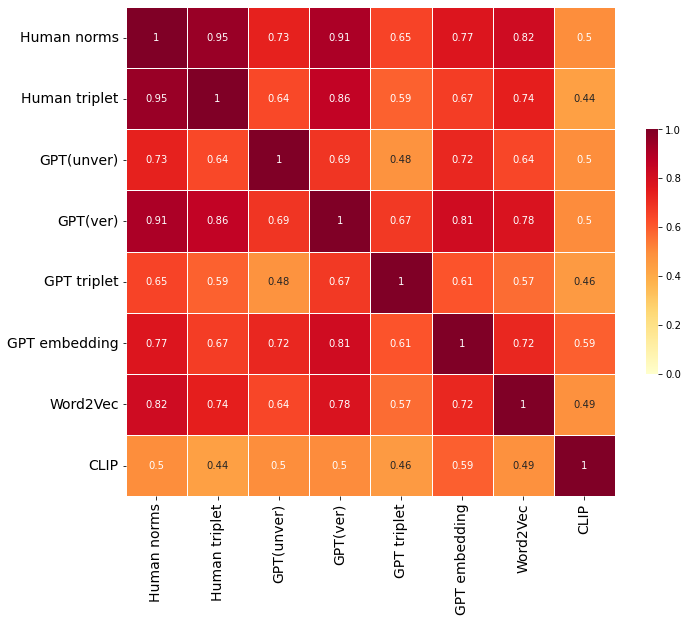

In [47]:
#  Ganked from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Assumes you have run `pip install numpy pandas matplotlib scikit-learn seaborn`

# Standard imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# For this example we'll use Seaborn, which has some nice built in plots
import seaborn as sns

corr = pd.read_csv('../results/correlation_table.csv', index_col=1, header=0)
corr = corr.iloc[:, 1:]

#rename rows and columns using the follwing list
names = ['Human norms', 'Word2Vec', 'CLIP', 'GPT(unver)', 'GPT(ver)', 'Human triplet', 'GPT triplet', 'GPT embedding']
corr.index = names
corr.columns = names

#rearange the rows and columns to match the following order
names = ['Human norms', 'Human triplet','GPT(unver)', 'GPT(ver)', 'GPT triplet', 'GPT embedding', 'Word2Vec', 'CLIP']
corr = corr.reindex(names)
corr = corr.reindex(names, axis=1)



# # Generate a mask for the upper triangle; True = do NOT show
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap = plt.cm.YlOrRd

# Draw the heatmap with the mask and correct aspect ratio
# More details at https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(
    corr,          # The data to plot
    # mask=mask,     # Mask some cells
    cmap=cmap,     # What colors to plot the heatmap as
    annot=True,    # Should the values be plotted in the cells?
    vmax=1,       # The maximum value of the legend. All higher vals will be same color
    vmin=0,      # The minimum value of the legend. All lower vals will be same color
    center=0.5,      # The center value of the legend. With divergent cmap, where white is
    square=True,   # Force cells to be square
    linewidths=.5, # Width of lines that divide cells
    cbar_kws={"shrink": .5}  # Extra kwargs for the legend; in this case, shrink by 50%
)
#remove the y-axis label
ax.set_ylabel('')

# Increase the size of the labels of make the resolution better
ax.tick_params(axis='both', which='major', labelsize=14)

#make the font such that it can be edited in illustrator
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

#save the figure as a pdf
plt.savefig('../graphs/heatmap.pdf', bbox_inches='tight')